In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("Stress.csv")

In [4]:
data.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [5]:
data.drop(['post_id','sentence_range'],axis=1,inplace=True)

In [6]:
data.head()

,subreddit,text,label,confidence,social_timestamp
0,ptsd,"He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [7]:
data['subreddit'].unique()

array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       'domesticviolence', 'anxiety', 'homeless', 'stress',
       'almosthomeless', 'food_pantry'], dtype=object)

In [8]:
data['text_length'] = data['text'].apply(len)

In [9]:
data.head(2)

,subreddit,text,label,confidence,social_timestamp,text_length
0,ptsd,"He said he had not felt that way before, sugge...",1,0.8,1521614353,571
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,588


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   text              2838 non-null   object 
 2   label             2838 non-null   int64  
 3   confidence        2838 non-null   float64
 4   social_timestamp  2838 non-null   int64  
 5   text_length       2838 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 133.2+ KB


In [11]:
data.isnull().sum()

subreddit           0
text                0
label               0
confidence          0
social_timestamp    0
text_length         0
dtype: int64

In [12]:
from datetime import datetime

In [13]:
data['date'] = data['social_timestamp'].apply(lambda time: datetime.fromtimestamp(time))

In [14]:
data['date']

0      2018-03-21 12:24:13
1      2018-05-22 23:08:37
2      2018-09-03 06:31:45
3      2018-01-20 12:10:55
4      2018-10-18 02:28:25
               ...        
2833   2018-01-06 03:02:24
2834   2018-10-18 07:35:12
2835   2018-10-11 20:33:32
2836   2017-03-08 07:40:43
2837   2017-03-07 23:43:36
Name: date, Length: 2838, dtype: datetime64[ns]

In [15]:
data['year'] = data['date'].apply(lambda date: date.year)

In [16]:
data['year']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
2833    2018
2834    2018
2835    2018
2836    2017
2837    2017
Name: year, Length: 2838, dtype: int64

In [17]:
data['year'].unique()

array([2018, 2017], dtype=int64)

In [18]:
data['month'] = data['date'].apply(lambda date: date.month)

In [19]:
data['month'].unique()

array([ 3,  5,  9,  1, 10, 12,  6,  7, 11,  4,  8,  2], dtype=int64)

In [20]:
data['day'] = data['date'].apply(lambda date: date.day)

In [21]:
data['week_day'] = data['date'].apply(lambda date: date.day_name)

In [22]:
data['hour'] = data['date'].apply(lambda date: date.hour)

In [23]:
data['minumte'] = data['date'].apply(lambda date: date.minute)

In [24]:
data['sec'] = data['date'].apply(lambda date: date.second)

In [25]:
data.head()

,subreddit,text,label,confidence,social_timestamp,text_length,date,year,month,day,week_day,hour,minumte,sec
0,ptsd,"He said he had not felt that way before, sugge...",1,0.8,1521614353,571,2018-03-21 12:24:13,2018,3,21,<built-in method day_name of Timestamp object ...,12,24,13
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,588,2018-05-22 23:08:37,2018,5,22,<built-in method day_name of Timestamp object ...,23,8,37
2,ptsd,My mom then hit me with the newspaper and it s...,1,0.8,1535935605,847,2018-09-03 06:31:45,2018,9,3,<built-in method day_name of Timestamp object ...,6,31,45
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,1277,2018-01-20 12:10:55,2018,1,20,<built-in method day_name of Timestamp object ...,12,10,55
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,0.8,1539809005,533,2018-10-18 02:28:25,2018,10,18,<built-in method day_name of Timestamp object ...,2,28,25


In [26]:
data.drop(['date','week_day'],axis=1,inplace=True)

In [27]:
data.head()

,subreddit,text,label,confidence,social_timestamp,text_length,year,month,day,hour,minumte,sec
0,ptsd,"He said he had not felt that way before, sugge...",1,0.8,1521614353,571,2018,3,21,12,24,13
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,588,2018,5,22,23,8,37
2,ptsd,My mom then hit me with the newspaper and it s...,1,0.8,1535935605,847,2018,9,3,6,31,45
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,1277,2018,1,20,12,10,55
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,0.8,1539809005,533,2018,10,18,2,28,25


In [28]:
data.drop(['social_timestamp'],axis=1,inplace=True)

In [29]:
data.head()

,subreddit,text,label,confidence,text_length,year,month,day,hour,minumte,sec
0,ptsd,"He said he had not felt that way before, sugge...",1,0.8,571,2018,3,21,12,24,13
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,1.0,588,2018,5,22,23,8,37
2,ptsd,My mom then hit me with the newspaper and it s...,1,0.8,847,2018,9,3,6,31,45
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,0.6,1277,2018,1,20,12,10,55
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,0.8,533,2018,10,18,2,28,25


In [30]:
data.groupby('subreddit')['text_length'].describe().sort_values('count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
ptsd,584.0,435.296233,157.677362,6.0,330.00,417.5,524.25,1271.0
relationships,552.0,463.898551,167.292838,142.0,354.00,428.0,539.00,1277.0
anxiety,503.0,447.763419,168.015419,6.0,338.00,418.0,532.50,1358.0
domesticviolence,316.0,436.512658,165.901395,6.0,335.00,406.5,512.25,1308.0
assistance,289.0,429.705882,143.763236,32.0,339.00,417.0,503.00,915.0
survivorsofabuse,245.0,473.485714,194.551557,88.0,348.00,437.0,559.00,1606.0
homeless,168.0,449.851190,177.114248,155.0,342.75,425.5,525.25,1281.0
almosthomeless,80.0,447.412500,208.517777,116.0,329.50,417.5,519.00,1639.0
stress,64.0,505.593750,203.001816,172.0,361.50,492.5,601.25,1354.0


array([<AxesSubplot: title={'center': '0'}>,
       <AxesSubplot: title={'center': '1'}>], dtype=object)

<Figure size 1000x500 with 0 Axes>

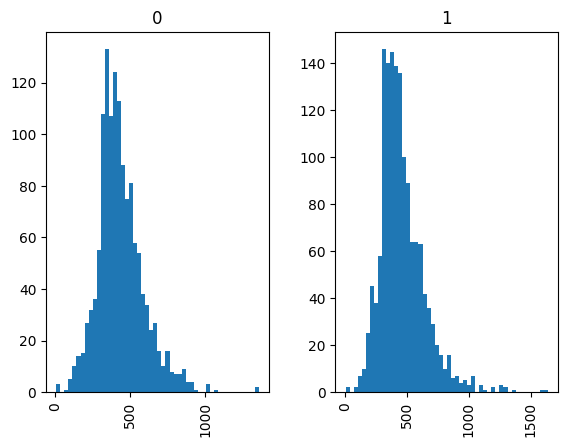

In [31]:
plt.figure(figsize=(10,5))
data.hist(column='text_length',by='label',bins=50)

#stressed have longer text length

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ptsd'),
  Text(1, 0, 'assistance'),
  Text(2, 0, 'relationships'),
  Text(3, 0, 'survivorsofabuse'),
  Text(4, 0, 'domesticviolence'),
  Text(5, 0, 'anxiety'),
  Text(6, 0, 'homeless'),
  Text(7, 0, 'stress'),
  Text(8, 0, 'almosthomeless'),
  Text(9, 0, 'food_pantry')])

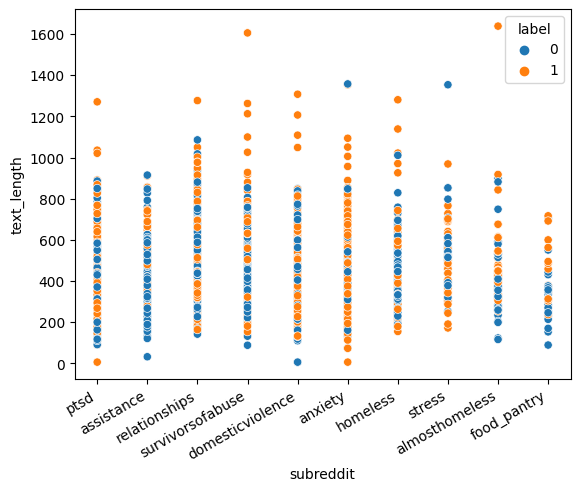

In [32]:
sns.scatterplot(data,x='subreddit',y='text_length',hue='label')
plt.xticks(rotation=30,ha='right')

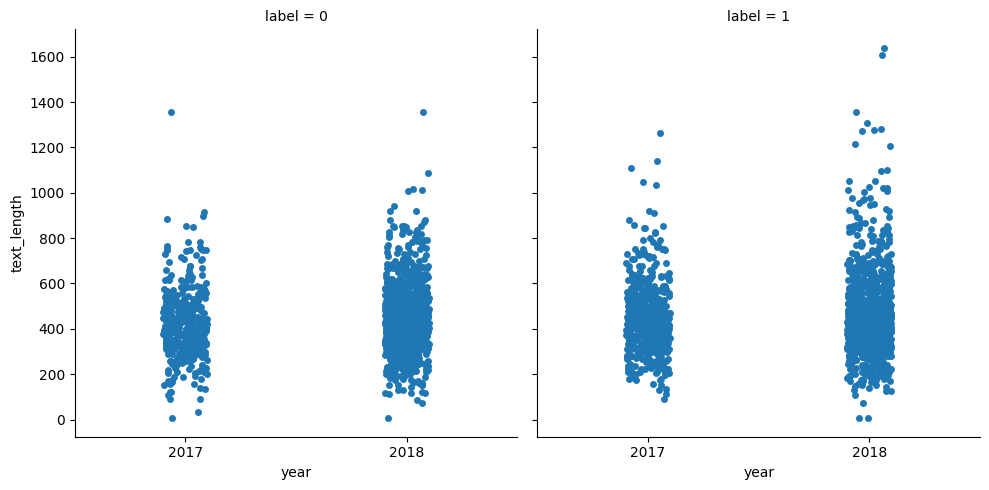

In [33]:
sns.catplot(data,x='year',y='text_length',col='label')

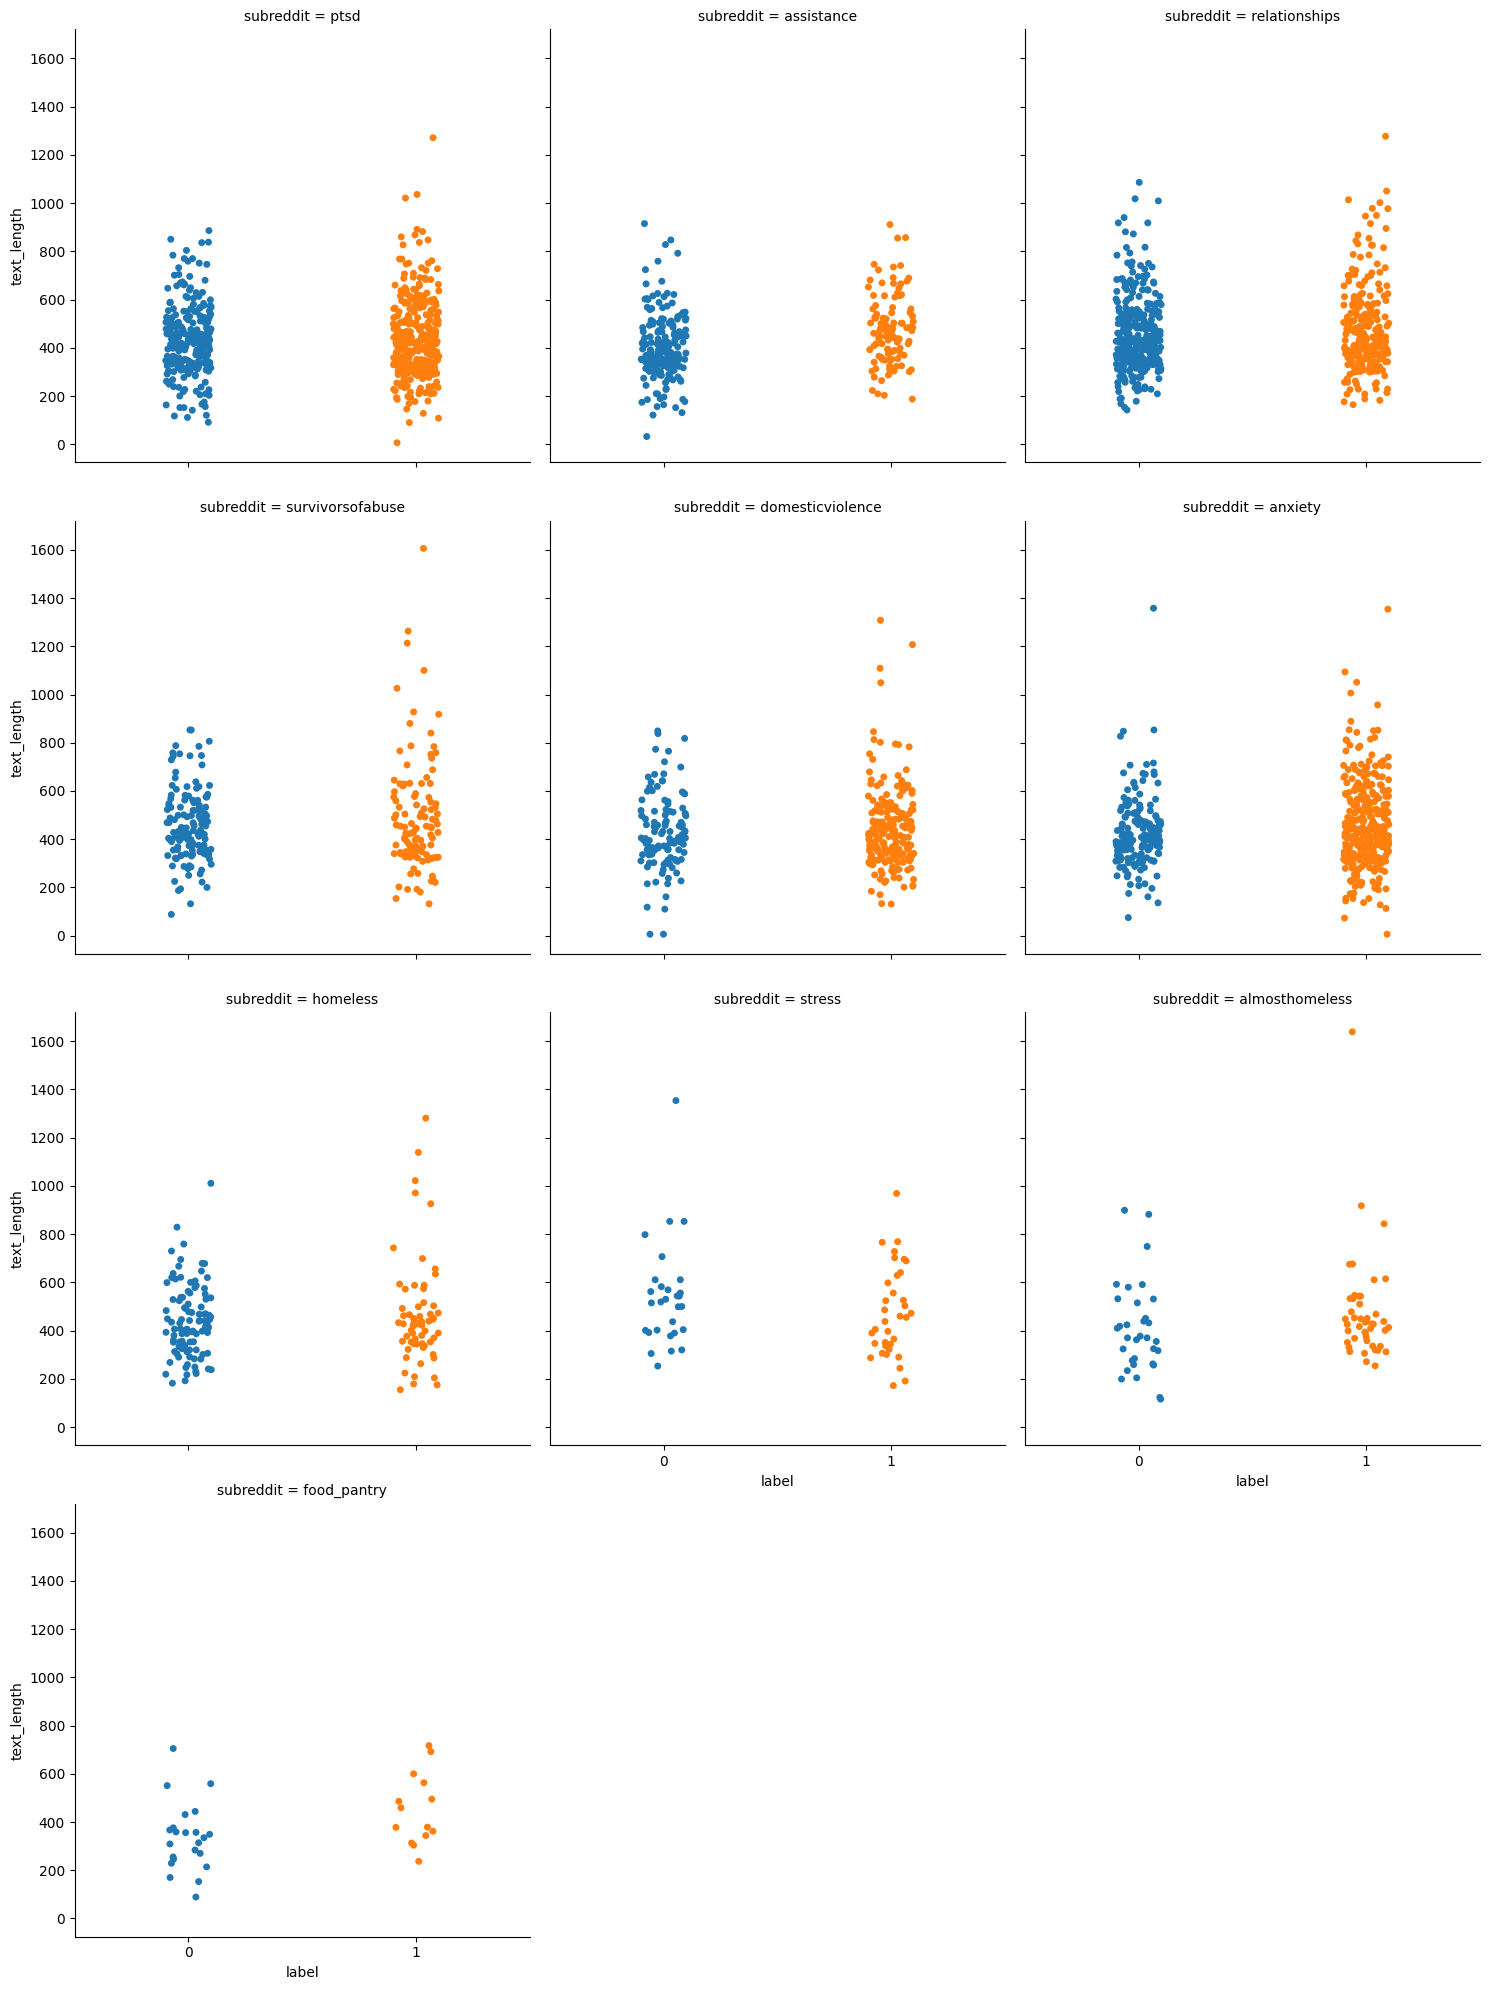

In [34]:
sns.catplot(data,x='label',y='text_length',col='subreddit',hue='label',col_wrap=3)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14')])

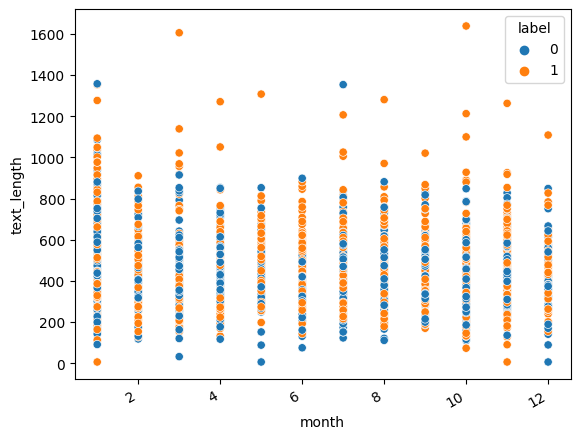

In [35]:
sns.scatterplot(data,x='month',y='text_length',hue='label')
plt.xticks(rotation=30,ha='right')

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

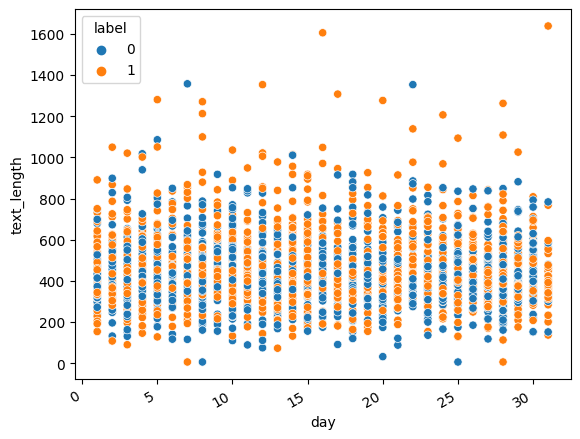

In [36]:
sns.scatterplot(data,x='day',y='text_length',hue='label')
plt.xticks(rotation=30,ha='right')

In [37]:
import string

In [38]:
from nltk.corpus import stopwords

In [39]:
def text_process(mess):
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [40]:
mess_data = data[['label','text_length','text']]

In [41]:
mess_data.head()

,label,text_length,text
0,1,571,"He said he had not felt that way before, sugge..."
1,0,588,"Hey there r/assistance, Not sure if this is th..."
2,1,847,My mom then hit me with the newspaper and it s...
3,1,1277,"until i met my new boyfriend, he is amazing, h..."
4,1,533,October is Domestic Violence Awareness Month a...


In [42]:
mess_data['text'].apply(text_process)

0       [said, felt, way, suggeted, go, rest, TRIGGER,...
1       [Hey, rassistance, sure, right, place, post, g...
2       [mom, hit, newspaper, shocked, would, knows, d...
3       [met, new, boyfriend, amazing, kind, sweet, go...
4       [October, Domestic, Violence, Awareness, Month...
                              ...                        
2833    [week, ago, Precious, ignored, Jan, 1, Happy, ...
2834    [dont, ability, cope, anymore, Im, trying, lot...
2835    [case, first, time, youre, reading, post, look...
2836    [find, normal, good, relationship, Main, probl...
2837    [talking, mom, morning, said, sister, trauma, ...
Name: text, Length: 2838, dtype: object

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
mess_transformer = CountVectorizer(analyzer = text_process).fit(mess_data['text'])

In [45]:
print(len(mess_transformer.vocabulary_))

13806


In [46]:
messages_bow = mess_transformer.transform(mess_data['text'])

In [47]:
print('Shape of Sparse Matrix:', messages_bow.shape)

Shape of Sparse Matrix: (2838, 13806)


In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

In [49]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [50]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [51]:
data['label_name'] = data['label'].map({0:'Not Stress',1:'Stress'})

In [52]:
mess_data['label_name']=data['label_name']

C:\Users\User\AppData\Local\Temp\ipykernel_5892\1553995936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mess_data['label_name']=data['label_name']


In [53]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
stress_detect_model = MultinomialNB().fit(messages_tfidf,mess_data['label_name'])

In [55]:
stress_detect_model.predict(messages_tfidf[0])

array(['Stress'], dtype='<U10')

In [56]:
mess_data['label_name'][0]

'Stress'

In [57]:
actual = mess_data['label_name']

In [58]:
actual

0           Stress
1       Not Stress
2           Stress
3           Stress
4           Stress
           ...    
2833    Not Stress
2834        Stress
2835    Not Stress
2836    Not Stress
2837        Stress
Name: label_name, Length: 2838, dtype: object

In [59]:
text_pred = stress_detect_model.predict(messages_tfidf)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print(classification_report(actual,text_pred))
print("\n")
print(confusion_matrix(actual,text_pred))

              precision    recall  f1-score   support

  Not Stress       1.00      0.71      0.83      1350
      Stress       0.79      1.00      0.88      1488

    accuracy                           0.86      2838
   macro avg       0.89      0.86      0.86      2838
weighted avg       0.89      0.86      0.86      2838



[[ 963  387]
 [   4 1484]]


In [62]:
mess_data['prediction'] = text_pred

C:\Users\User\AppData\Local\Temp\ipykernel_5892\220068250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mess_data['prediction'] = text_pred


In [63]:
mess_data.head()

,label,text_length,text,label_name,prediction
0,1,571,"He said he had not felt that way before, sugge...",Stress,Stress
1,0,588,"Hey there r/assistance, Not sure if this is th...",Not Stress,Not Stress
2,1,847,My mom then hit me with the newspaper and it s...,Stress,Stress
3,1,1277,"until i met my new boyfriend, he is amazing, h...",Stress,Stress
4,1,533,October is Domestic Violence Awareness Month a...,Stress,Stress


In [64]:
mess_data['prediction_lable'] = mess_data['prediction'].map({'Stress':1,'Not Stress':0})

C:\Users\User\AppData\Local\Temp\ipykernel_5892\2218378004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mess_data['prediction_lable'] = mess_data['prediction'].map({'Stress':1,'Not Stress':0})


<AxesSubplot: xlabel='label', ylabel='prediction_lable'>

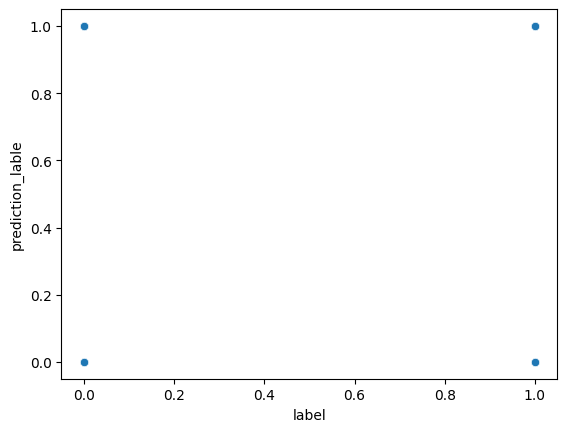

In [65]:
sns.scatterplot(mess_data,x='label',y='prediction_lable')

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
msg_train,msg_test,label_train,label_test = train_test_split(mess_data['text'],mess_data['label_name'],test_size=0.3)

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
from sklearn.pipeline import Pipeline

In [70]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('clasifier',RandomForestClassifier())
])

In [71]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000025332728310>)),
                ('tfidf', TfidfTransformer()),
                ('clasifier', RandomForestClassifier())])

In [72]:
prediction = pipeline.predict(msg_test)

In [73]:
print(classification_report(label_test,prediction))
print("\n")
print(confusion_matrix(label_test,prediction))

              precision    recall  f1-score   support

  Not Stress       0.74      0.55      0.63       413
      Stress       0.66      0.82      0.73       439

    accuracy                           0.69       852
   macro avg       0.70      0.68      0.68       852
weighted avg       0.70      0.69      0.68       852



[[227 186]
 [ 81 358]]


In [74]:
cm = confusion_matrix(label_test,prediction)

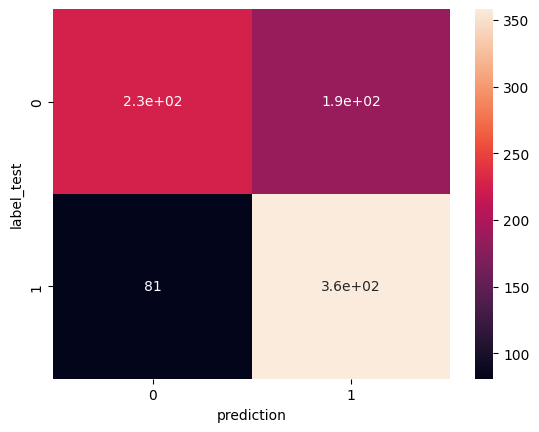

In [75]:
sns.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel("label_test")
plt.show()

In [76]:
messages_tfidf[300]

<1x13806 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [77]:
stress_detect_model.predict(messages_tfidf[300])

array(['Not Stress'], dtype='<U10')